**Loading data**

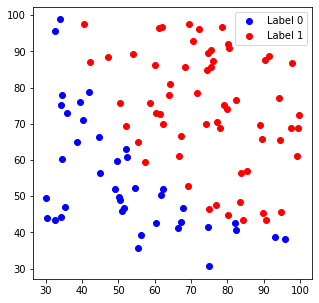

In [0]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

data = np.genfromtxt("data.txt", delimiter=',')

data_x       = data[:, 0]
data_y       = data[:, 1]
label   = data[:, 2]

x_label0    = data_x[label == 0]
x_label1    = data_x[label == 1]

y_label0    = data_y[label == 0]
y_label1    = data_y[label == 1]

plt.figure(figsize=(5, 5))
plt.scatter(x_label0, y_label0, c='b', label='Label 0')
plt.scatter(x_label1, y_label1, c='r', label='Label 1')
plt.legend()
plt.show()


**Main process**

In [0]:
t0=[]
t1=[]
t2=[]
Energy=[]
class LogisticRegression():
  def __init__(self, X, y, eta, w):
    self.X = X
    self.y = y        
    self.eta = eta
    self.w = w
    self.m, self.n = np.shape(X)

  def SigFunction(self, z):
    return 1.0 / (1.0 + np.exp( -z ))  

  def CostFunction(self, w, X, y):
    w = w.reshape((self.n,1))
    z = X * w
    phi =self.SigFunction(z)
    # calculating the cost function
    part1 = np.multiply(y, np.log(phi))
    part2 = np.multiply((1 - y), np.log(1 - phi))
    J = (-part1 - part2).sum()/self.m
    # calculating the gradient
    grad = X.T * (phi - y) / self.m       
    return J, grad    
  
  def GradientDescent(self, interation):
    for i in range(0, interation):
      J, grad = self.CostFunction(self.w, self.X, self.y)
      self.w = self.w - self.eta*grad
      t0.append(self.w[0, 0])
      t1.append(self.w[1, 0])
      t2.append(self.w[2, 0])
      Energy.append(J)
    return self.w

  def Fit(self):      
    interation = 100000
    self.w = self.GradientDescent(interation)           
    z = self.X * self.w
    phi = self.SigFunction(z)        
        
  def plot(self):
    if self.n == 3:
      ind_1 = np.where(self.y == 1)
      ind_0 = np.where(self.y == 0)
      x1_1 = self.X[:, [1]].min()
      x1_2 = self.X[:, [1]].max()
      x2_1 = -(self.w[0, 0] + self.w[1, 0]*x1_1)/self.w[2, 0]
      x2_2 = -(self.w[0, 0] + self.w[1, 0]*x1_2)/self.w[2, 0]
      plt.plot(self.X[ind_1, [1]], self.X[ind_1, [2]], "bo", markersize=3)
      plt.plot(self.X[ind_0, [1]], self.X[ind_0, [2]], "ro", markersize=3)                
      plt.plot([x1_1, x1_2], [x2_1, x2_2], color='black', label='Decision Boundary')
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.legend()
      plt.show()
    return 1
# creating an instance of the Logisticr  
X, y = data[:,[0,1]], _f[:,[2]]
m = np.shape(X)[0]
# add a column of 1
X = np.hstack((np.matrix(np.ones((_m, 1))),X))
y = np.matrix(_y)
eta = 0.001 
n= np.shape(X)[1]
w = np.matrix(np.zeros((_n, 1)))
eta = 0.001
n= np.shape(X)[1]
w = np.matrix(np.zeros((n, 1)))      
lr = LogisticRegression(X, y, eta, w);
lr.Fit()

**Plot Parameters**

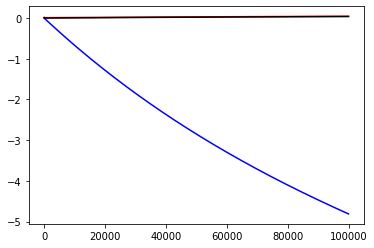

In [0]:
plt.plot(t0, c='b')
plt.plot(t1, c='r')
plt.plot(t2, c='k')
plt.show()

**Plot loss function**

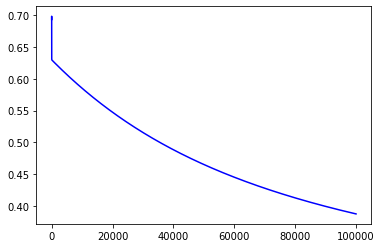

In [0]:
plt.plot(Energy, c='b')
plt.show()

**Plot the obtained classifier**

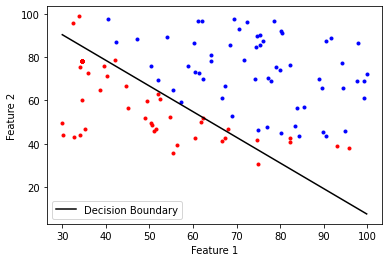

1

In [61]:
lr.plot()